# Decision Tree

## Information Gain

In [1]:
import numpy as np

result = -(10/16 * np.log2(10/16) + 6/16 * np.log2(6/16))
print(result)

0.9544340029249649


In [2]:
result1 = (8/16) * -(7/8 * np.log2(7/8) + 1/8 * np.log2(1/8))
result2 = (8/16) * -(5/8 * np.log2(5/8) + 3/8 * np.log2(3/8))
print(result1 + result2) # 0.7489992230622806

0.7489992230622806


## BMI 예제

### Data preprocessing

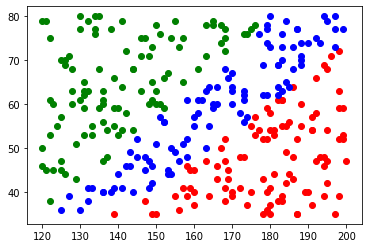

In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings(action='ignore')

df = pd.read_csv('/content/drive/MyDrive/ML Colab/data/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

num_of_data = 100

# label: 0 => red
x_data_red = x_data[t_data==0][:num_of_data]
t_data_red = t_data[t_data==0][:num_of_data]

# label: 1 => blue
x_data_blue = x_data[t_data==1][:num_of_data]
t_data_blue = t_data[t_data==1][:num_of_data]

# label: 2 => green
x_data_green = x_data[t_data==2][:num_of_data]
t_data_green = t_data[t_data==2][:num_of_data]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0], x_data_green[:,1], color='g')

plt.show()

# sample
x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green),axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green),axis=0)

### Decision Tree Model

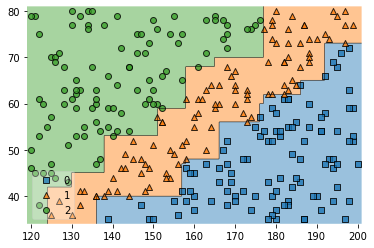

In [4]:
model = DecisionTreeClassifier()
model.fit(x_data_sample, t_data_sample)
plot_decision_regions(X=x_data_sample, y=t_data_sample, clf=model, legend=3)

plt.show() # 격자모양

### Accuracy
전체 BMI 데이터를 이용해서 의사결정트리 모델을 구축하여 정확도를 측정해보자.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('/content/drive/MyDrive/ML Colab/data/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

# data split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data, t_data, test_size=0.2, random_state=0)

# model
model = DecisionTreeClassifier() 

# learning
model.fit(x_data_train, t_data_train)

# evaluation
result = classification_report(t_data_test, model.predict(x_data_test))
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1276
           1       1.00      1.00      1.00      1158
           2       1.00      1.00      1.00      1566

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

